In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Get filenames in list
from os import listdir
from os.path import isfile, join

mypath = "/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/images/"

file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

print(str(len(file_names)) + ' images loaded')

3000 images loaded


In [59]:
import cv2
import numpy as np
import sys
import os
import shutil

# Extract 1000 for our training data and 500 for our validation set
# Takes about ~20 seconds to run
dog_count = 0
cat_count = 0
training_size = 1000
test_size = 500
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150
dog_dir_train = "/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/train/dogs/"
cat_dir_train = "/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/train/cats/"
dog_dir_val = "/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/validation/dogs/"
cat_dir_val = "/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/validation/cats/"
def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(dog_dir_train)
make_dir(cat_dir_train)
make_dir(dog_dir_val)
make_dir(cat_dir_val)



def getZeros(number):
    if(number > 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""
    

    
from PIL import Image

for i, file in enumerate(file_names):
    
    if file_names[i][0] == "d":
        dog_count += 1
        image = Image.open(mypath+file)
        image = image.resize((size,size), Image.ANTIALIAS)
        image_array = np.asarray(image)
        if dog_count <= training_size:

            training_images.append(image_array)
            training_labels.append(1)
            zeros = getZeros(dog_count)
            cv2.imwrite(dog_dir_train + "dog" + str(zeros) + str(dog_count) + ".jpg", image_array)
        if dog_count > training_size and dog_count <= training_size+test_size:
            test_images.append(image_array)
            test_labels.append(1)
            zeros = getZeros(dog_count-1000)
            cv2.imwrite(dog_dir_val + "dog" + str(zeros) + str(dog_count-1000) + ".jpg",image_array)
            
    if file_names[i][0] == "c":
        cat_count += 1
        image = Image.open(mypath+file)
        image = image.resize((size,size), Image.ANTIALIAS)
        image_array = np.asarray(image)
        if cat_count <= training_size:
            training_images.append(image_array)
            training_labels.append(0)
            zeros = getZeros(cat_count)
            cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count) + ".jpg", image_array)
        if cat_count > training_size and cat_count <= training_size+test_size:
            test_images.append(image_array)
           
            test_labels.append(0)
            zeros = getZeros(cat_count-1000)
            cv2.imwrite(cat_dir_val + "cat" + str(zeros) + str(cat_count-1000) + ".jpg", image_array)

    if dog_count == training_size+test_size and cat_count == training_size+test_size:
        break 

print("Training and Test Data Extraction Complete")

Training and Test Data Extraction Complete


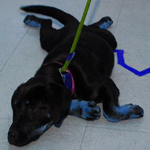

1 - Dog


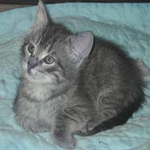

2 - Cat


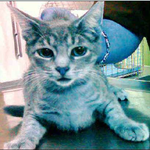

3 - Cat


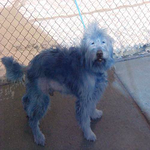

4 - Dog


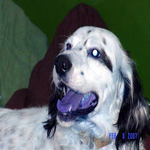

5 - Dog


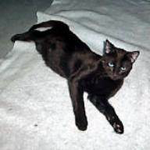

6 - Cat


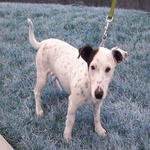

7 - Dog


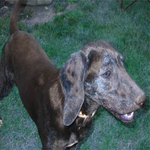

8 - Dog


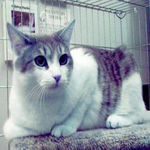

9 - Cat


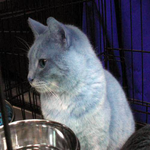

10 - Cat


In [60]:
# Using numpy's savez function to store our loaded data as NPZ files
np.savez('/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/cats_vs_dogs_training_data.npz', np.array(training_images))
np.savez('/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/cats_vs_dogs_training_labels.npz', np.array(training_labels))
np.savez('/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/cats_vs_dogs_test_data.npz', np.array(test_images))
np.savez('/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/cats_vs_dogs_test_labels.npz', np.array(test_labels))



# Loader Function
import numpy as np

def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)


from google.colab.patches import cv2_imshow
for i in range(1,11):
    random = np.random.randint(0, len(training_images))
    cv2_imshow(training_images[random])
    if training_labels[random] == 0:
        print(str(i) + " - Cat")
    else:
        print(str(i)+ " - Dog")
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [61]:
(x_train, y_train), (x_test, y_test) = load_data_training_and_test("cats_vs_dogs")

# Reshaping our label data from (2000,) to (2000,1) and test data from (1000,) to (1000,1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


In [62]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 16
epochs = 25

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_45 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_46 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 34, 34, 64)      

In [19]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

model.save("/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/cats_vs_dogs_V1.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])




Train on 2000 samples, validate on 1000 samples
Epoch 1/25





2000/2000 [==============================] - 17s 8ms/step - loss: 0.7409 - acc: 0.5240 - val_loss: 0.6884 - val_acc: 0.5020
Epoch 2/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6623 - acc: 0.6165 - val_loss: 0.6881 - val_acc: 0.6270
Epoch 3/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5999 - acc: 0.6870 - val_loss: 0.5759 - val_acc: 0.7150
Epoch 4/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5571 - acc: 0.7320 - val_loss: 0.5592 - val_acc: 0.7130
Epoch 5/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5048 - acc: 0.7615 - val_loss: 0.6888 - val_acc: 0.6810
Epoch 6/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4573 - acc: 0.7965 - val_loss: 0.5805 - val_acc: 0.7190
Epoch 7/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3931 - acc: 0.8260 - val_loss: 0.5797 - val_acc: 0.7130
Epoch

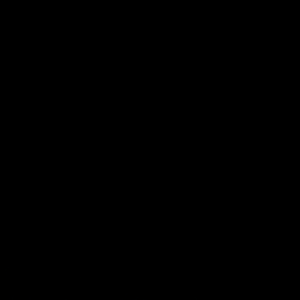

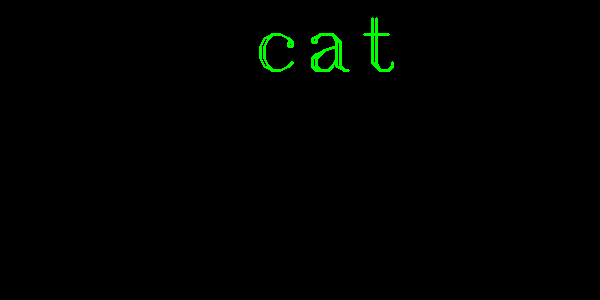

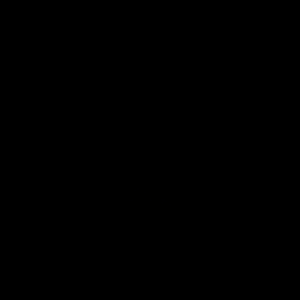

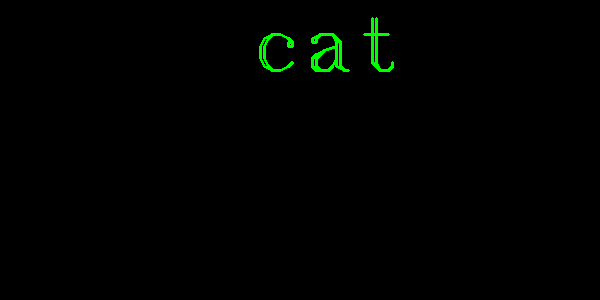

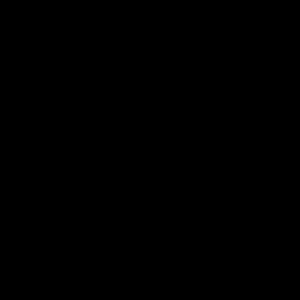

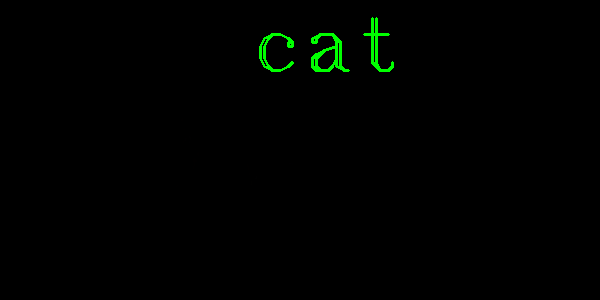

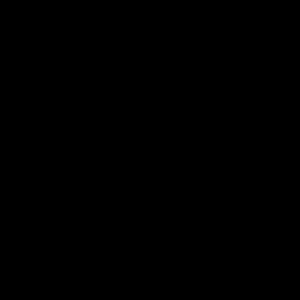

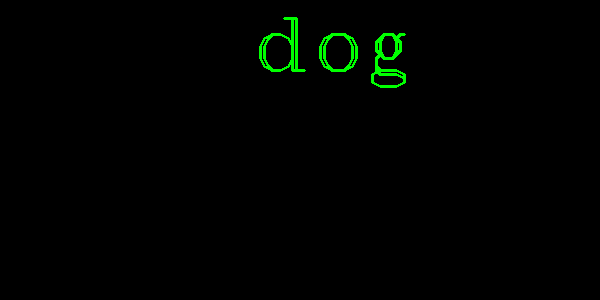

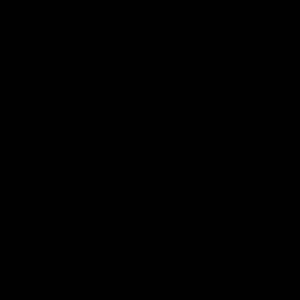

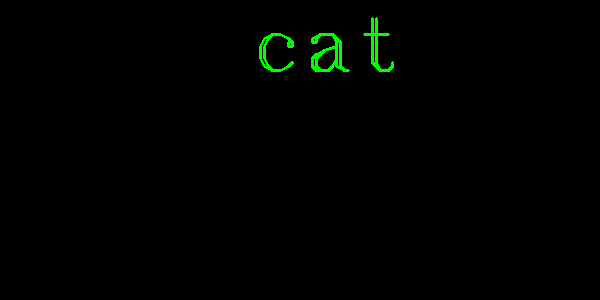

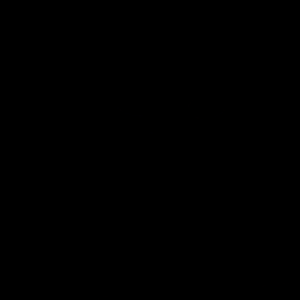

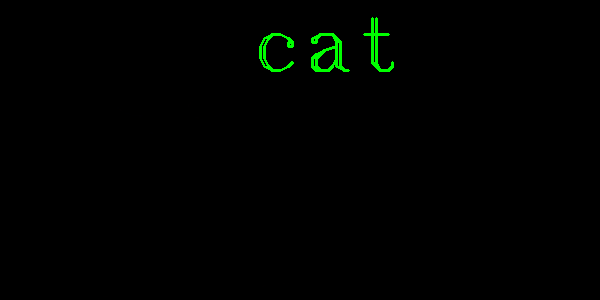

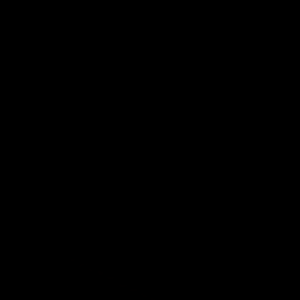

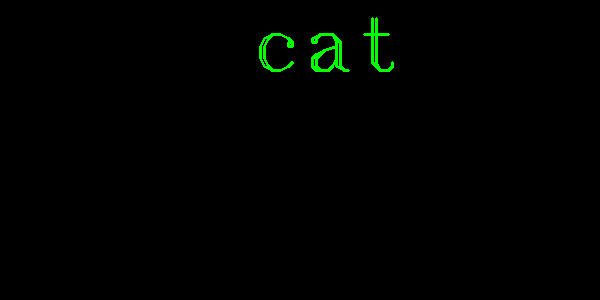

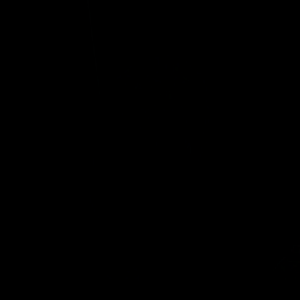

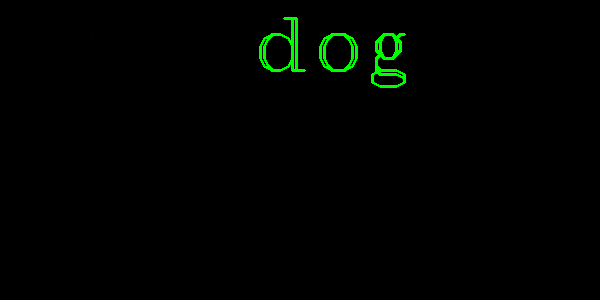

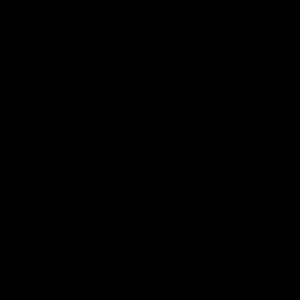

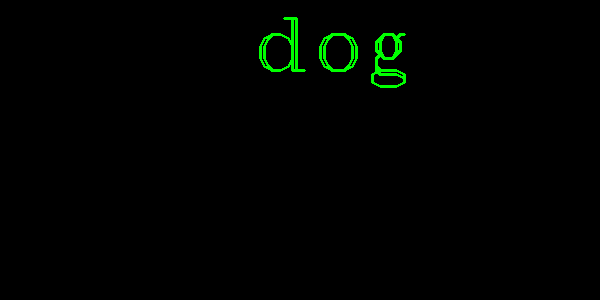

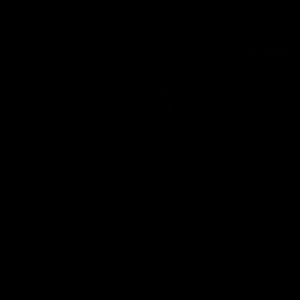

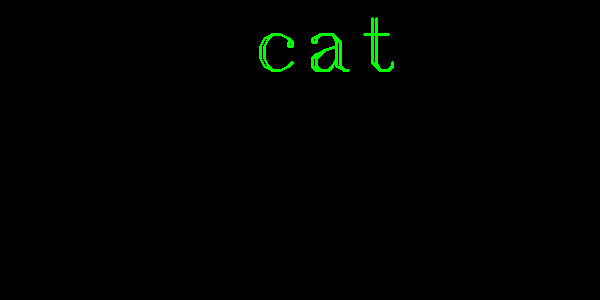

In [38]:
import cv2
import numpy as np
from keras.models import load_model

classifier = load_model("/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/cats_vs_dogs_V1.h5")

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    if pred == "[0]":
        pred = "cat"
    if pred == "[1]":
        pred = "dog"
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (252, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2_imshow(expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    cv2_imshow(imageL)

    input_im = input_im.reshape(1,150,150,3) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [53]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape = (150, 150, 3)
img_width = 150
img_height = 150

nb_train_samples = 2000
nb_validation_samples = 1000
batch_size = 16
epochs = 25

train_data_dir = '/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/train'
validation_data_dir = '/content/drive/My Drive/DeepLearningCV/datasets/catsvsdogs/validation'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations
      width_shift_range = 0.3,       # randomly applies width shifting
      height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = True,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
# Creating out model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_36 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_37 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 34, 34, 64)       

In [55]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/15
125/125 [==============================] - 17s 135ms/step - loss: 0.7190 - acc: 0.5135 - val_loss: 0.6921 - val_acc: 0.5091
Epoch 2/15
125/125 [==============================] - 15s 119ms/step - loss: 0.6939 - acc: 0.5135 - val_loss: 0.7550 - val_acc: 0.4919
Epoch 3/15
125/125 [==============================] - 15s 119ms/step - loss: 0.6863 - acc: 0.5820 - val_loss: 0.6823 - val_acc: 0.5244
Epoch 4/15
125/125 [==============================] - 15s 119ms/step - loss: 0.6772 - acc: 0.5915 - val_loss: 0.6355 - val_acc: 0.6636
Epoch 5/15
125/125 [==============================] - 15s 118ms/step - loss: 0.6650 - acc: 0.6010 - val_loss: 0.6317 - val_acc: 0.6077
Epoch 6/15
125/125 [==============================] - 15s 120ms/step - loss: 0.6568 - acc: 0.6140 - val_loss: 0.6295 - val_acc: 0.6382
Epoch 7/15
125/125 [==============================] - 14s 116ms/step - loss: 0.6414 - acc: 0.6195 - val_loss: 0.6120 - val_acc: 0.6575
Epoch 8/15
125/125 [==============================] - 1

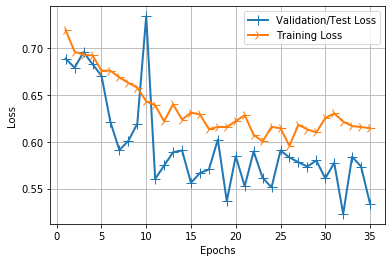

In [43]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

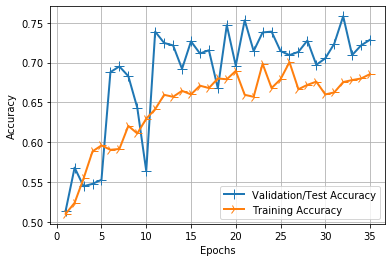

In [44]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()